# Multivariate Ordinary Least-Squares (OLS) Regression

In this module, we introduced linear regression modeling with $p$ predictors.  Hence, the data set will include $n$ observations $(y_i,x_{i,1},...,x_{i,p})$, $1 \leq i \leq n$, and we assume:
$$
y_i = f(x_i) + \varepsilon_i = \beta_0+\sum_{j=1}^p \beta_j\,x_{i,j} + \varepsilon_i.
$$
Like in the univariate case, OLS regression determines the estimate $\hat{\beta}$ that best approximates the training data in the *least-squares sense*:
$$
\hat{\beta}^{\text{OLS}} = \text{argmin}_{\beta}\left\{\sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p \beta_j\,x_{i,j}\right)\right)^2 \right\}.
$$
The OLS estimate also still has nice properties as we had discussed in this module.

Let's evaluate multivariate regression in our example setting of 100m dash times.

We start by loading libraries. Here, importantly we consider two libraries for running linear regressions: [statsmodels](https://www.statsmodels.org/stable/index.html) and  [scikit-learn](https://scikit-learn.org/stable/).

Statsmodels is a packaged with nice-looking output and it allows for nice regression output and also confortable input (e.g., formula-based more similar to the look and feel in `R`). Scikit-learn is one of the most popular predictive modeling toolboxes and we will use it for many (!) models/algorithms throughout this course:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## Getting the data

To make the data available, we can clone the github repository for this class into your colab notebook, via (remove the hashtag of course):

In [2]:
!git clone https://github.com/danielbauer1979/MSDIA_PredictiveModelingAndMachineLearning.git

Cloning into 'MSDIA_PredictiveModelingAndMachineLearning'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (19/19), 44.94 KiB | 958.00 KiB/s, done.
Resolving deltas: 100% (6/6), done.


If you now list the content...

In [3]:
!ls

MSDIA_PredictiveModelingAndMachineLearning  sample_data


you should see `MSDIA_PredictiveModelingAndMachineLearning` listed. And we can pull the data from there:

In [4]:
dash_data = pd.read_csv('MSDIA_PredictiveModelingAndMachineLearning/886_II_3_100mDashData.csv')
dash_data.head()

,Hair Length,Height,Time
0,30.0,173.0,14.5
1,8.0,173.0,14.0
2,5.3,171.2,13.7
3,3.5,195.0,13.2
4,5.0,190.0,14.0


We can look at the data some. E.g. we can calculate sample statistics:

In [5]:
dash_data.describe()

,Hair Length,Height,Time
count,12.000000,12.000000,12.000000
mean,14.400000,174.600000,14.291667
std,11.168218,9.915644,1.320095
min,3.500000,161.000000,12.500000
25%,5.000000,169.500000,13.575000
50%,8.500000,172.100000,14.000000
75%,25.750000,179.250000,15.000000
max,30.000000,195.000000,17.000000


Or we can plot some key interactions:

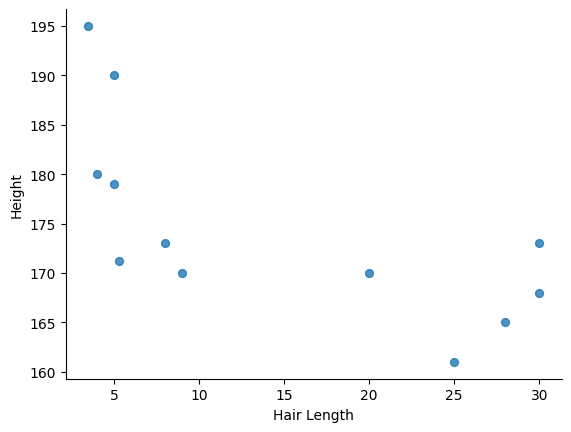

In [6]:
# @title Hair Length vs Height

from matplotlib import pyplot as plt
dash_data.plot(kind='scatter', x='Hair Length', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

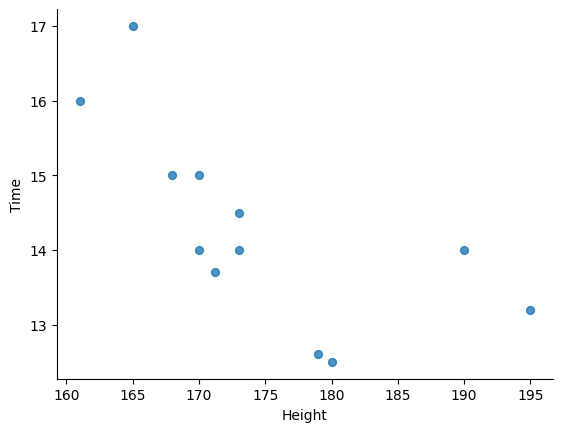

In [7]:
# @title Height vs Time

from matplotlib import pyplot as plt
dash_data.plot(kind='scatter', x='Height', y='Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

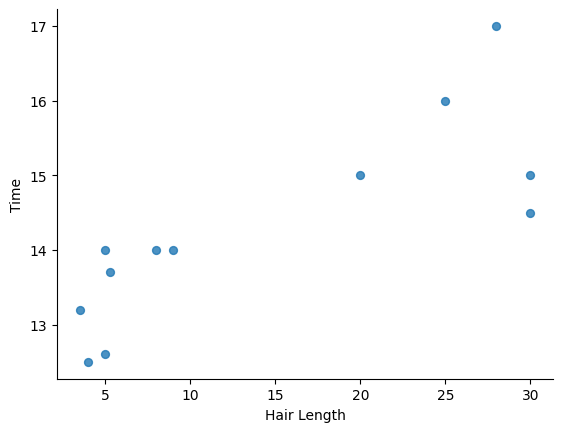

In [8]:
# @title Hair Length vs Time

from matplotlib import pyplot as plt
dash_data.plot(kind='scatter', x='Hair Length', y='Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Running Regression Models

### Via Statsmodels

Let's run our linear regression via statsmodels:

In [9]:
y = dash_data['Time']
X = dash_data.drop(columns=['Time'])
X = sm.add_constant(X) # Add a constant term as the default model doesn't include one
model_sm = sm.OLS(y, X).fit()
# Check regression results
model_sm.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     9.791
Date:                Mon, 10 Jun 2024   Prob (F-statistic):            0.00552
Time:                        17:02:56   Log-Likelihood:                -12.904
No. Observations:                  12   AIC:                             31.81
Df Residuals:                       9   BIC:                             33.26
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          18.7209      6.229      3.005      0.015       4.630      32.812
Hair Length     0.0765      0.030      2.542      0.032       0.008       0.145
Height         -0.0317      0.034     -0.934      0.375      -0.108       0.045
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.652
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.437
Skew:                           0.206   Prob(JB):                        0.804
Kurtosis:                       2.160   Cond. No.                     4.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Via SkLearn

Let's run our linear regression via statsmodels:

In [10]:
y = dash_data['Time']
X = dash_data.drop(columns=['Time'])
model_sk = LinearRegression()
model_sk.fit(X, y)
print(model_sk.intercept_)
print(model_sk.coef_)

18.720861895215
[ 0.0765368  -0.03167998]


## Predict

Let's use our model to generate in-sample predictions:

In [11]:
y_hat = model_sk.predict(X)
y_hat

array([15.53632872, 13.85251912, 13.70289373, 12.81114388, 13.084349  ,
       15.69472863, 13.43282882, 15.63669499, 13.32461204, 15.53380452,
       14.02409587, 14.86600067])

with errors:

In [12]:
y - y_hat

0    -1.036329
1     0.147481
2    -0.002894
3     0.388856
4     0.915651
5    -0.694729
6    -0.832829
7     1.363305
8    -0.824612
9     0.466195
10   -0.024096
11    0.133999
Name: Time, dtype: float64

Some error metrics:

1) Mean-Absolute Error (MAE):

In [13]:
np.average(np.abs(y_hat - y))

0.5692479693744628

2) Mean-Absolute Percentage Error (MAPE):

In [14]:
np.average(np.abs((y_hat - y)/y))

0.039620561547345494

3) Root Mean-squared Error (RMSE):

In [15]:
np.sqrt(np.average((y_hat - y)*(y_hat - y)))

0.7092292749583692